In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import *
from keras.models import *
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import os, shutil
import warnings
import random
import cv2
warnings.filterwarnings('ignore')

In [31]:
train_path = 'FloresNativas-sin-modificaciones/train'
validation_path = 'FloresNativas-sin-modificaciones/valid'
test_path = 'FloresNativas-sin-modificaciones/test'
train_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/train/Ananuca/'))
train_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/train/Azulillo/'))
train_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/train/Chagual/'))
train_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/train/Chilco/'))
train_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/train/Copihue/'))
validation_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/valid/Ananuca/'))
validation_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/valid/Azulillo/'))
validation_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chagual/'))
validation_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/valid/Chilco/'))
validation_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/valid/Copihue/'))
test_path_ananuca = len(os.listdir('FloresNativas-sin-modificaciones/test/Ananuca/'))
test_path_azulillo = len(os.listdir('FloresNativas-sin-modificaciones/test/Azulillo/'))
test_path_chagual = len(os.listdir('FloresNativas-sin-modificaciones/test/Chagual/'))
test_path_chilco = len(os.listdir('FloresNativas-sin-modificaciones/test/Chilco/'))
test_path_copihue = len(os.listdir('FloresNativas-sin-modificaciones/test/Copihue/'))
image_categories = os.listdir('FloresNativas-sin-modificaciones/train')

print("NÚMERO TOTAL DE IMÁGENES A UTILIZAR : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue +
test_path_ananuca + test_path_azulillo + test_path_chagual +test_path_chilco + test_path_copihue + validation_path_ananuca + validation_path_azulillo + 
validation_path_chagual + validation_path_chilco + validation_path_copihue ))
print('-----------------------------------------------------')
print("SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : {}".format(train_path_ananuca + train_path_azulillo + train_path_chagual +train_path_chilco + train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Entrenamiento  : {}".format(train_path_ananuca))
print("Set de imágenes de Azulillo para Entrenamiento : {}".format(train_path_azulillo))
print("Set de imágenes de Chagual para Entrenamiento  : {}".format(train_path_chagual))
print("Set de imágenes de Chilco para Entrenamiento   : {}".format(train_path_chilco))
print("Set de imágenes de Copihue para Entrenamiento  : {}".format(train_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Validación  : {}".format(validation_path_ananuca))
print("Set de imágenes de Azulillo para Validación : {}".format(validation_path_azulillo))
print("Set de imágenes de Chagual para Validación  : {}".format(validation_path_chagual))
print("Set de imágenes de Chilco para Validación   : {}".format(validation_path_chilco))
print("Set de imágenes de Copihue para Validación  : {}".format(validation_path_copihue))
print('-----------------------------------------------------')
print("Set de imágenes de Añañuca para Testing  : {}".format(test_path_ananuca))
print("Set de imágenes de Azulillo para Testing : {}".format(test_path_azulillo))
print("Set de imágenes de Chagual para Testing  : {}".format(test_path_chagual))
print("Set de imágenes de Chilco para Testing   : {}".format(test_path_chilco))
print("Set de imágenes de Copihue para Testing  : {}".format(test_path_copihue))
print('-----------------------------------------------------')


NÚMERO TOTAL DE IMÁGENES A UTILIZAR : 2750
-----------------------------------------------------
SET DE IMÁGENES TOTALES PARA ENTRENAMIENTO : 1925
-----------------------------------------------------
Set de imágenes de Añañuca para Entrenamiento  : 372
Set de imágenes de Azulillo para Entrenamiento : 393
Set de imágenes de Chagual para Entrenamiento  : 390
Set de imágenes de Chilco para Entrenamiento   : 394
Set de imágenes de Copihue para Entrenamiento  : 376
-----------------------------------------------------
Set de imágenes de Añañuca para Validación  : 115
Set de imágenes de Azulillo para Validación : 104
Set de imágenes de Chagual para Validación  : 104
Set de imágenes de Chilco para Validación   : 113
Set de imágenes de Copihue para Validación  : 114
-----------------------------------------------------
Set de imágenes de Añañuca para Testing  : 63
Set de imágenes de Azulillo para Testing : 53
Set de imágenes de Chagual para Testing  : 56
Set de imágenes de Chilco para Testing

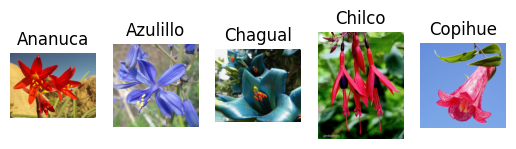

In [32]:
def plot_images(image_categories):

 # Create a figure
 plt.figure(figsize=(10, 10))
for i, cat in enumerate(image_categories):

 # Load images for the ith category

    image_path = train_path + '/' + cat
    images_in_folder = os.listdir(image_path)
    first_image_of_folder = images_in_folder[0]
    first_image_path = image_path + '/' + first_image_of_folder
    img = tf.keras.utils.load_img(first_image_path)
    img_arr = tf.keras.utils.img_to_array(img)/255.0


 # Create Subplot and plot the images
    plt.subplot(1, 5, i+1)
    plt.imshow(img_arr)
    plt.title(cat)
    plt.axis('off')

plt.show()


In [ ]:
#MOSTRAR EJEMPLOS DE CADA CLASE

In [33]:
train_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
train_image_generator = train_gen.flow_from_directory(
 train_path,
 target_size=(224, 224),
 batch_size=25,
 class_mode='categorical')


Found 1925 images belonging to 5 classes.


In [ ]:
val_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
val_image_generator = train_gen.flow_from_directory(
 validation_path,
 target_size=(224, 224),
 batch_size=25,
 class_mode='categorical')

In [ ]:
test_gen = ImageDataGenerator(rescale = 1.0/255.0) # Normalise the data
test_image_generator = train_gen.flow_from_directory(
 test_path,
 target_size=(150, 150),
 batch_size=5,
 class_mode='categorical')

In [ ]:
class_map = dict([(v, k) for k, v in train_image_generator.class_indices.items()])
print(class_map)

In [ ]:
model = Sequential() # model object

In [ ]:
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',
input_shape=[150, 150, 3]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics='accuracy')
hist = model.fit(train_image_generator,
                 epochs=10,
                 verbose=1, 
                 validation_data=val_image_generator,
                 steps_per_epoch = 1925//30,
                 validation_steps = 550//30,
                 callbacks=early_stopping)

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
model.evaluate(test_image_generator)

In [ ]:
test_image_path = 'FloresNativas-sin-modificaciones/test/Ananuca/Screenshot_417_png.rf.00209ab040fc4cce2d980453c295eaca.jpg'
def generate_predictions(test_image_path, actual_label):
    
    #load and preprocess the image
    test_img = tf.keras.utils.load_img(test_image_path, target_size=(150, 150))
    test_img_arr = tf.keras.utils.img_to_array(test_img)/255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1],test_img_arr.shape[2]))
    
    #Make predictions
    predicted_label = np.argmax(model.predict(test_img_input)) 
    predicted_vegetable = class_map[predicted_label]
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_arr)
    plt.title("Predicted Label: {}, Actual Label: {}".format(predicted_vegetable, actual_label))
    plt.grid()
    plt.axis('off')
    plt.show()   
    
#Call the function
generate_predictions(test_image_path, actual_label='Añañuca') 